---
title: "Linear Regression Blogpost"
author: "Michael Alex Kyer"
date: "9/26/2023"
format: 
  html:
    code-fold: true
jupyter: python3
---

<h1>What is Regression<h1>
Simply put, regression is a method used in data analysis which compares one or more independent variables to a single dependent variable. To further define this term, let's use the analogy of a final exam for a difficult test. The dependent variable here will be the score of the exam, and there can be a multitude of factors, or independent variables, that play into what score you get. The time spent studying for the exam, the number of lectures attended, the amount of sleep the night before, what was ate the day of the exam, other stressful events currently going on, and so on. Now assume you have data on all of these factors for a multitude of students. Some questions you might have include Which factors will affect the final score the most? Will some factors not affect the score at all? We can use regression to answer these questions. A regression model will create a function that predicts the result of the dependent variable from the value of the independent variable.

<h1>How to Use a Regression Model<h1>
To create the aforementioned function, a plot is created with the y values mapping to the dependent variable, and the x values mapping to the independent variable. In our final exam analogy, we would have a multitude of plots. Assuming a sample of 100 students, one plot would have 100 points mapping the hours spent studying (x value) to their score on the final exam (y value). Another could map the number of lectures attended to the final exam score. A third could map the calories eaten before the exam to the final exam score. These plots could go on and on. For each plot created, we can use regression to generate the aforementioned function, and this function can be used to determine a correlation between each independent variable, and the dependent variable. It is also important to note that there are multiple different kinds of regression including linear, multiple, non-linear, and many more. We will use a linear regression model as it is the most simple, and the most frequently used. That being said, a multiple regression model could be used for our previous example to simultaneously analyze a multitude of independent variables on their effect on the final exam score.

<h1>Linear Regression Example: An Analysis of Red Wine Quality<h1>
In this next example, we will use code to perform a regression analysis on data provided by UC Irvine on how a variety of factors affect red wine quality.

In [45]:
import sys
!{sys.executable} -m pip install ucimlrepo
import ucimlrepo
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LinearRegression

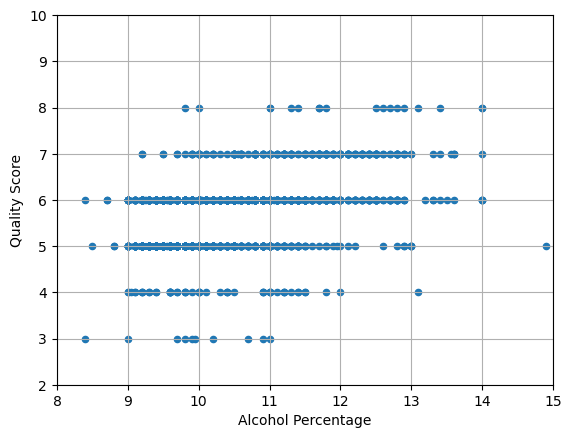

In [50]:
wine_quality = pd.read_csv("winequality-red.csv")

alcohol = []
target = []
for index, row in wine_quality.iterrows():
    values = row.values[0].split(';')
    target.append(float(values[-1]))
    alcohol.append(float(values[-2]))

d = {'Alcohol Percentage': alcohol, 'Quality Score': target}
wine_dataframe = pd.DataFrame(data=d)

X = wine_dataframe[["Alcohol Percentage"]].values
y = wine_dataframe[["Quality Score"]].values

# Visualize the data
wine_dataframe.plot(kind='scatter', grid=True,
             x="Alcohol Percentage", y="Quality Score")
plt.axis([8, 15, 2, 10])
plt.show()

With the above plot, we observe a graph representation of the wine dataset. We have plotted a point for each entry in the provided CSV file with an x-value equal to the alchohol percentage, and a y-value equal to the quality score. Based on observing the visual graph alone, we can begin to make assumptions regarding the data, but we can go further by utilizing regression.

The correlation of alcohol percent to wine quality is 0.48


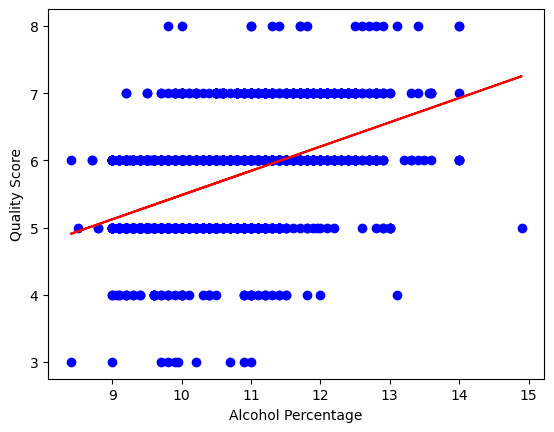

The predicted score for a red wine with an alcohol percentage of 8.5 is 4.94
The predicted score for a red wine with an alcohol percentage of 8.5 is 5.88
The predicted score for a red wine with an alcohol percentage of 8.5 is 7.18


In [65]:
model = LinearRegression()

model.fit(X, y)

print("The correlation of alcohol percent to wine quality is %.2f" % math.sqrt(model.score(X, y)))

# Make a prediction for Cyprus
plt.scatter(X, y,color='b')
plt.xlabel("Alcohol Percentage")
plt.ylabel("Quality Score")
plt.plot(X, model.predict(X),color='r') # outputs [[6.30165767]]
plt.show()
X_1 = [[8.5]]
X_2 = [[11.1]]
X_3 = [[14.7]]
print("The predicted score for a red wine with an alcohol percentage of 8.5 is %.2f" % model.predict(X_1)[0][0])
print("The predicted score for a red wine with an alcohol percentage of 11.1 is %.2f" % model.predict(X_2)[0][0])
print("The predicted score for a red wine with an alcohol percentage of 14.7 is %.2f" % model.predict(X_3)[0][0])

Utilizing the sklearn library, we can gather additional information regarding the relationship between alcohol percentage and the quality score given to the wine. First, we observe the correlation of these variables is approximately 0.48. This means that there is a moderate, positive correlation between these values. This fact is further shown when plotting a regression line on top of the graph. We see that this line is at a positive diagonal, and here we can infer that a red wine with a higher alcohol percentage will likely have a higher score than a red wine with a lower alcohol percentage. This fact is further illustrated by utilizing the sklearn predict method. This method will use the existing data and the regression line to predict the y-value of an x-value added to the set. Here, we have predicted the quality score for red wines with an alcohol percentage of 8.5, 11.1, and 14.7. The predicted scores increased as the theoretical alcohol percetage values increased, and this is yet another way to visualize the relationship between alcohol percentage and the quality score of red wine.

With this in mind, let's repeat this process with another independent variable provided in the data set, the amount of residual sugar. Repeating this process can provide us with a correlation between the amount of residual sugar and the quality score.

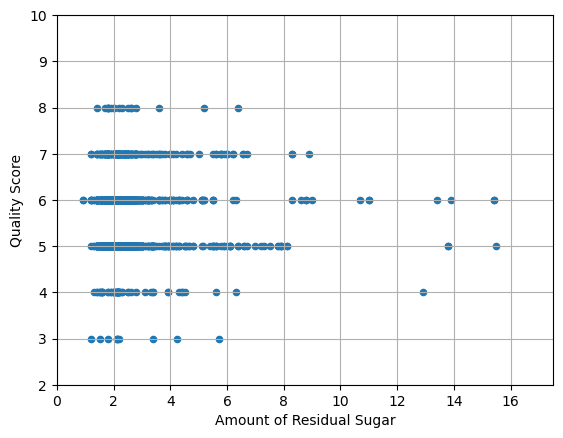

The correlation of amount of residual sugar to wine quality is 0.01


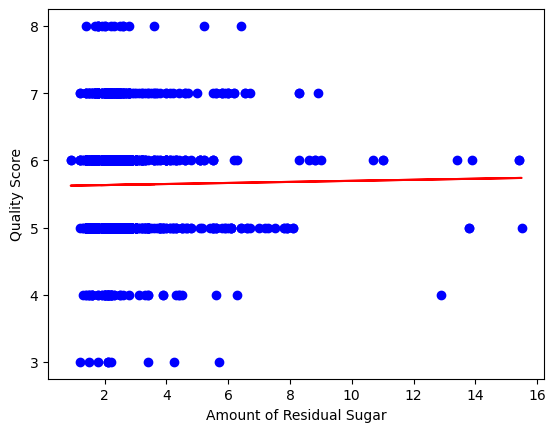

The predicted score for a red wine with a residual sugar amount of 4 is 5.65
The predicted score for a red wine with a residual sugar amount of 8 is 5.68
The predicted score for a red wine with a residual sugar amount of 12 is 5.71


In [88]:
residual_sugar = []
for index, row in wine_quality.iterrows():
    values = row.values[0].split(';')
    residual_sugar.append(float(values[3]))

d = {'Amount of Residual Sugar': residual_sugar, 'Quality Score': target}
wine_dataframe = pd.DataFrame(data=d)

X = wine_dataframe[["Amount of Residual Sugar"]].values
y = wine_dataframe[["Quality Score"]].values

# Visualize the data
wine_dataframe.plot(kind='scatter', grid=True,
             x="Amount of Residual Sugar", y="Quality Score")
plt.axis([0, 17.5, 2, 10])
plt.show()

model = LinearRegression()

model.fit(X, y)

print("The correlation of amount of residual sugar to wine quality is %.2f" % math.sqrt(model.score(X, y)))

# Make a prediction for Cyprus
plt.scatter(X, y,color='b')
plt.xlabel("Amount of Residual Sugar")
plt.ylabel("Quality Score")
plt.plot(X, model.predict(X),color='r') # outputs [[6.30165767]]
plt.show()
X_1 = [[4]]
X_2 = [[8]]
X_3 = [[12]]
print("The predicted score for a red wine with a residual sugar amount of 4 is %.2f" % model.predict(X_1)[0][0])
print("The predicted score for a red wine with a residual sugar amount of 8 is %.2f" % model.predict(X_2)[0][0])
print("The predicted score for a red wine with a residual sugar amount of 12 is %.2f" % model.predict(X_3)[0][0])

Observing the results of our regression analysis, we see that it is extremely difficult to predict the quality score of a red wine based on the amount of residual sugar within. We once again show this in 3 ways. First, the correlation value is almost 0. Secondly, the line of regression is almost horizontal. Thirdly, predicting the quality score of different red wines with different amounts of residual sugar provides almost identical scoring. With these 3 things in mind, we can infer that the amount of residual sugar is not a good metric to infer the quality score of a red wine.

And that concludes this post regarding (linear) regression. If you would like more information on linear regression, or regression in general, check out these sources that I also utilized in the making of this blog post:
Harvard Business Review - A Refresher on Regression Analysis (https://hbr.org/2015/11/a-refresher-on-regression-analysis)
IMSL - What Is a Regression Model? (https://www.imsl.com/blog/what-is-regression-model)